 Loading Breast Cancer Dataset...
 Data Loaded Successfully!

 First 5 Rows of Dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   m

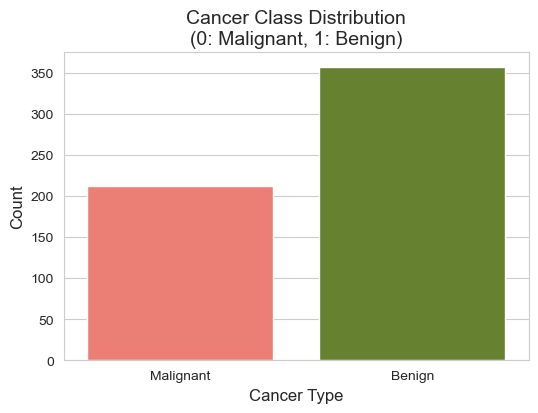

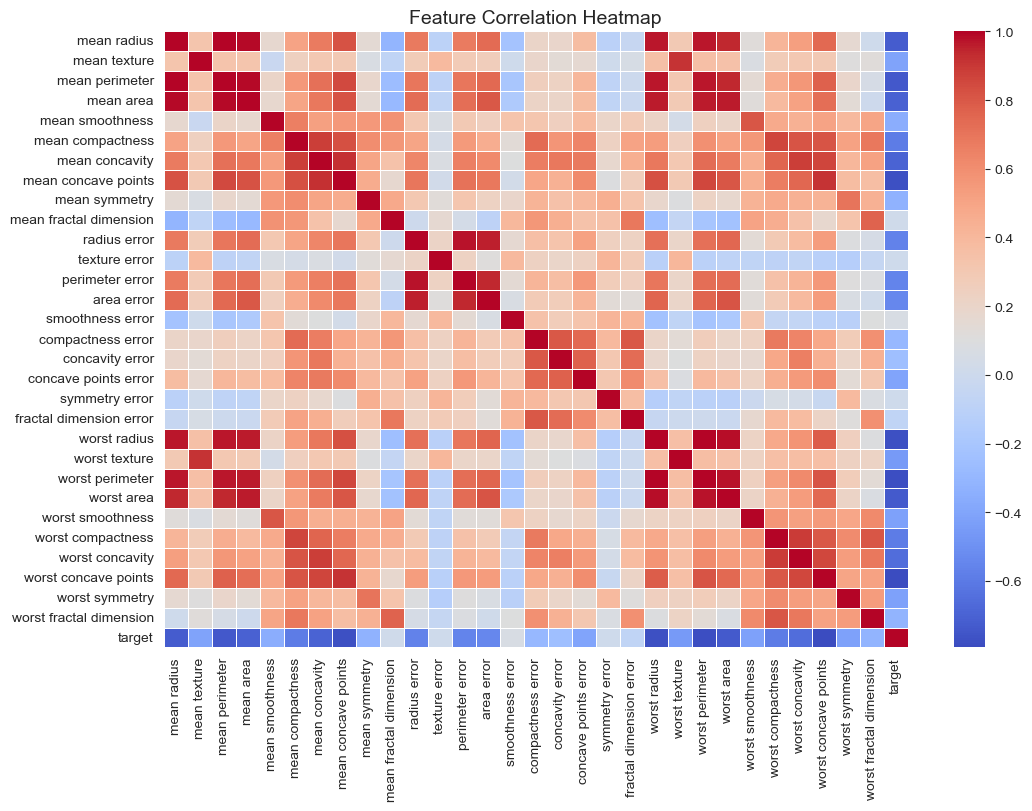


 Splitting Data into Train & Test Sets...
 Data Splitting & Scaling Complete!

 Training Models...

 Training Logistic Regression...
 Logistic Regression Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


 Training Random Forest...
 Random Forest Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


 Training SVM...
 SVM Accuracy: 0.9561
              precision    recall  f1-score   support

           0       

KeyboardInterrupt: 

In [2]:
#  Breast Cancer Prediction using Machine Learning

#  Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Aesthetic Settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

#  Loading the Dataset
print(" Loading Breast Cancer Dataset...")
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(" Data Loaded Successfully!")

#  Display First Few Rows
print("\n First 5 Rows of Dataset:")
print(df.head())

#  Cancer Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['target'], hue=df['target'], palette=['#FF6F61', '#6B8E23'], legend=False)
plt.title("Cancer Class Distribution\n(0: Malignant, 1: Benign)", fontsize=14)
plt.xlabel("Cancer Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ["Malignant", "Benign"])
plt.show()

#  Feature Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

#  Data Preprocessing & Splitting
print("\n Splitting Data into Train & Test Sets...")
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(" Data Splitting & Scaling Complete!")

#  Model Training & Evaluation
print("\n Training Models...")
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear')
}

results = []
for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc])
    print(f" {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

#  Display Model Comparison
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print("\n Model Performance Comparison:")
print(results_df)

#  Hyperparameter Tuning for Random Forest
print("\nOptimizing Random Forest Model...")
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

#  Best Model Accuracy
y_pred_best = best_model.predict(X_test)
best_acc = accuracy_score(y_test, y_pred_best)
print(f"\n Best Random Forest Model Accuracy: {best_acc:.4f}")

#  Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

#  Feature Importance
plt.figure(figsize=(8, 5))
feature_importance = pd.Series(best_model.feature_importances_, index=data.feature_names)
feature_importance.nlargest(10).plot(kind='barh', color='teal', edgecolor='black')
plt.title("Top 10 Important Features", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

print("\n Analysis Complete!")
